<a href="https://colab.research.google.com/github/LanaCoded/data-analysis-/blob/main/DMart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/content/DMart.csv")

In [3]:
df

,Name,Brand,Price,DiscountedPrice,Category,SubCategory,Quantity,Description,BreadCrumbs
0,Premia Badam (Almonds),Premia,451.0,329.0,Grocery,Grocery/Dry Fruits,500 gm,India,Grocery > Grocery/Dry Fruits
1,Premia Badam (Almonds),Premia,109.0,85.0,Grocery,Grocery/Dry Fruits,100 gm,India,Grocery > Grocery/Dry Fruits
2,Premia Badam (Almonds),Premia,202.0,175.0,Grocery,Grocery/Dry Fruits,200 gm,India,Grocery > Grocery/Dry Fruits
3,Nutraj California Almonds (Badam),Nutraj,599.0,349.0,Grocery,Dry Fruits,500 gm,USA,Grocery > Dry Fruits
4,Nutraj California Almonds (Badam),Nutraj,1549.0,659.0,Grocery,Dry Fruits,1 kg,USA,Grocery > Dry Fruits
...,...,...,...,...,...,...,...,...,...
5184,Navneet Youva A4 Notebook - Assorted,Navneet,55.0,36.0,School Supplies,School Needs,1 Book,OverviewEach book has an index page with label...,School Supplies > School Needs
5185,Navneet Youva Longbook Journal - Assorted,Navneet,85.0,69.0,School Supplies,School Needs,1 Book,OverviewStrong & sturdy case binding. Easy to ...,School Supplies > School Needs
5186,Navneet Youva Long Notebook - Assorted,Navneet,55.0,40.0,School Supplies,School Needs,1 Book,OverviewAttractive colour and designs. Easy to...,School Supplies > School Needs
5187,Navneet Youva Drawing Book - Assorted,Navneet,110.0,72.0,School Supplies,School Needs,1 Book,OverviewDrawing book has attractive cover desi...,School Supplies > School Needs


In [4]:
df.describe()

,Price,DiscountedPrice
count,5188.000000,5188.000000
mean,344.030360,236.669719
std,601.034092,387.198716
min,0.000000,0.000000
25%,85.000000,64.000000
50%,175.000000,125.000000
75%,345.000000,249.000000
max,10990.000000,7999.000000


In [5]:
df.isnull().sum()

,0
Name,1
Brand,400
Price,1
DiscountedPrice,1
Category,3
SubCategory,3
Quantity,1
Description,2
BreadCrumbs,3


In [6]:
df['Brand'] = df['Brand'].fillna('Unknown')

df['Category'] = df['Category'].fillna('Unknown')

df['DiscountedPrice'] = df['DiscountedPrice'].fillna(df['DiscountedPrice'].mean())

df.dropna(subset=['Price', 'DiscountedPrice'], inplace=True)

In [7]:
df['Discount_Percent'] = ((df['Price'] - df['DiscountedPrice']) / df['Price']) * 100

avg_discount = df.groupby('Category')['Discount_Percent'].mean().sort_values(ascending=False)
print("Average Discount per Category:\n", avg_discount)

Average Discount per Category:
 Category
Geep                             61.865712
Smartwatches                     58.343057
Butterfly                        57.467860
Zebronics                        56.750757
Backpacks                        51.732478
Unknown                          50.005771
Pigeon                           49.958275
Wonderchef                       49.075472
Syska                            43.804756
Computer Accessories             37.614940
Joyo Plastics                    36.889328
Specials                         32.720674
Clothing & Accessories           32.361201
Appliances                       31.653101
Plant Container                  30.972572
Beauty & Cosmetics               29.153130
Home & Kitchen                   29.010845
Packaged Food                    28.679332
Personal Care                    25.930840
DMart Grocery                    24.903072
Kitchen Aprons                   24.561404
Fruits & Vegetables              22.323331
Grocery      

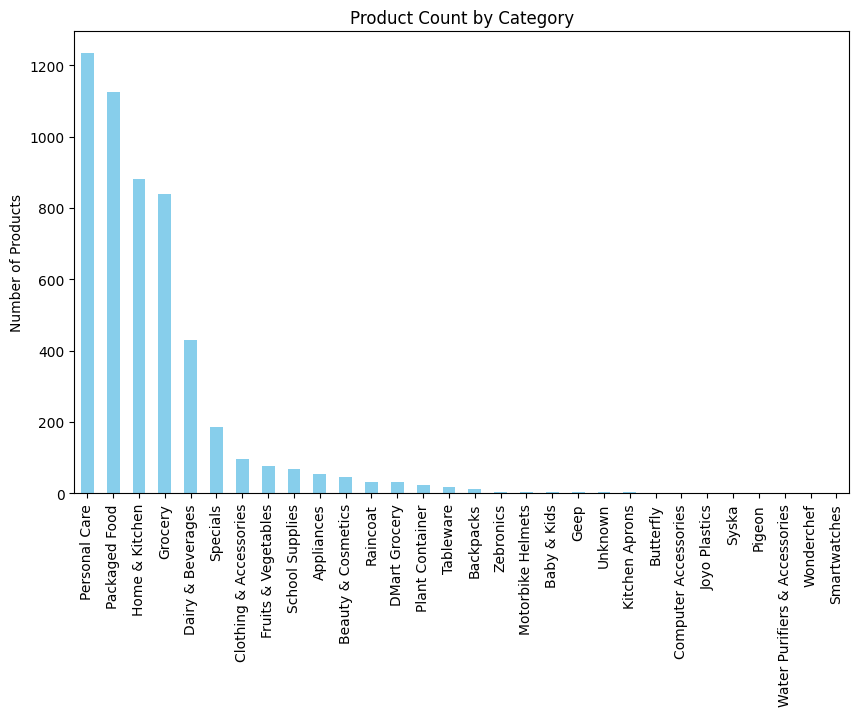

In [8]:
plt.figure(figsize=(10, 6))
df['Category'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Product Count by Category')
plt.ylabel('Number of Products')
plt.show()

In [9]:
import re

# Extracting the numeric part and the unit part
df['Qty_Value'] = df['Quantity'].str.extract('(\d+\.?\d*)').astype(float)
df['Qty_Unit'] = df['Quantity'].str.extract('([a-zA-Z]+)')

# Clean the units (lowercase and remove spaces)
df['Qty_Unit'] = df['Qty_Unit'].str.lower().str.strip()

In [10]:
def normalize_quantity(row):
    val = row['Qty_Value']
    unit = row['Qty_Unit']

    if unit in ['kg', 'l']:
        return val * 1000  # Convert kg to grams or L to ml
    return val  # Keep gm and ml as is

df['Normalized_Qty'] = df.apply(normalize_quantity, axis=1)

In [11]:
if (df["Qty_Value"] == df["Normalized_Qty"]).all():
  print("True")
else:
  print("False")

  # just a hunch

False


In [12]:
df

,Name,Brand,Price,DiscountedPrice,Category,SubCategory,Quantity,Description,BreadCrumbs,Discount_Percent,Qty_Value,Qty_Unit,Normalized_Qty
0,Premia Badam (Almonds),Premia,451.0,329.0,Grocery,Grocery/Dry Fruits,500 gm,India,Grocery > Grocery/Dry Fruits,27.050998,500.0,gm,500.0
1,Premia Badam (Almonds),Premia,109.0,85.0,Grocery,Grocery/Dry Fruits,100 gm,India,Grocery > Grocery/Dry Fruits,22.018349,100.0,gm,100.0
2,Premia Badam (Almonds),Premia,202.0,175.0,Grocery,Grocery/Dry Fruits,200 gm,India,Grocery > Grocery/Dry Fruits,13.366337,200.0,gm,200.0
3,Nutraj California Almonds (Badam),Nutraj,599.0,349.0,Grocery,Dry Fruits,500 gm,USA,Grocery > Dry Fruits,41.736227,500.0,gm,500.0
4,Nutraj California Almonds (Badam),Nutraj,1549.0,659.0,Grocery,Dry Fruits,1 kg,USA,Grocery > Dry Fruits,57.456423,1.0,kg,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5184,Navneet Youva A4 Notebook - Assorted,Navneet,55.0,36.0,School Supplies,School Needs,1 Book,OverviewEach book has an index page with label...,School Supplies > School Needs,34.545455,1.0,book,1.0
5185,Navneet Youva Longbook Journal - Assorted,Navneet,85.0,69.0,School Supplies,School Needs,1 Book,OverviewStrong & sturdy case binding. Easy to ...,School Supplies > School Needs,18.823529,1.0,book,1.0
5186,Navneet Youva Long Notebook - Assorted,Navneet,55.0,40.0,School Supplies,School Needs,1 Book,OverviewAttractive colour and designs. Easy to...,School Supplies > School Needs,27.272727,1.0,book,1.0
5187,Navneet Youva Drawing Book - Assorted,Navneet,110.0,72.0,School Supplies,School Needs,1 Book,OverviewDrawing book has attractive cover desi...,School Supplies > School Needs,34.545455,1.0,book,1.0


In [13]:
# price per 100 units
df['Price_per_100'] = (df['DiscountedPrice'] / df['Normalized_Qty']) * 100

In [14]:
df["DiscountedPrice"].max()

7999.0

In [15]:
df.loc[[df["Price_per_100"].idxmax()]]
# price per 100 is too big for items as such we might need to narrow them down a bit


,Name,Brand,Price,DiscountedPrice,Category,SubCategory,Quantity,Description,BreadCrumbs,Discount_Percent,Qty_Value,Qty_Unit,Normalized_Qty,Price_per_100
2796,Philips UV-C Disinfection System,Philips,10990.0,7999.0,Home & Kitchen,Disinfectants,1 Unit,\n- Philips has a UV - C Lamp offering which u...,Home & Kitchen > Disinfectants,27.215651,1.0,unit,1.0,799900.0


In [16]:
print(df["Price_per_100"].sort_values(ascending=False))

2796    799900.0
3458    499900.0
3490    469900.0
3489    414900.0
4773    359900.0
          ...   
5045         NaN
5046         NaN
5047         NaN
5148         NaN
5149         NaN
Name: Price_per_100, Length: 5188, dtype: float64


In [17]:
# top 10 most expensive products per 100 units
print(df.nlargest(10, 'Price_per_100'))

                                                   Name             Brand  \
2796                   Philips UV-C Disinfection System           Philips   
3458            Godrej Goldilocks Personal White Locker            Godrej   
3490                Bathla Advance 5 Step Ladder-Orange            Bathla   
3489                Bathla Advance 4 Step Ladder-Orange            Bathla   
4773  Crompton Greaves Avancer Antidust Bakers Ceili...  Crompton Greaves   
3453              DHomes Multi-Hanger Steel Cloth Stand            DHomes   
4777                    Usha Mist Air Duos Pedestal Fan              Usha   
3200            Vaya Tyffyn Lunch Box - Plain - 1 Litre       Vaya Tyffyn   
2790                 Nilkamal Freedom Mini Shoe Cabinet          Nilkamal   
4775      Usha Striker Platinum GBD Ceiling Fan 1200 mm              Usha   

        Price  DiscountedPrice        Category           SubCategory Quantity  \
2796  10990.0           7999.0  Home & Kitchen         Disinfectants   

In [18]:
# Check basic stats
print(df['Price_per_100'].describe())

count      5013.000000
mean       6167.553788
std       27253.650244
min           0.000000
25%          25.000000
50%          73.000000
75%        1100.000000
max      799900.000000
Name: Price_per_100, dtype: float64


In [19]:
df.drop(["Quantity"], axis = 1)

,Name,Brand,Price,DiscountedPrice,Category,SubCategory,Description,BreadCrumbs,Discount_Percent,Qty_Value,Qty_Unit,Normalized_Qty,Price_per_100
0,Premia Badam (Almonds),Premia,451.0,329.0,Grocery,Grocery/Dry Fruits,India,Grocery > Grocery/Dry Fruits,27.050998,500.0,gm,500.0,65.8
1,Premia Badam (Almonds),Premia,109.0,85.0,Grocery,Grocery/Dry Fruits,India,Grocery > Grocery/Dry Fruits,22.018349,100.0,gm,100.0,85.0
2,Premia Badam (Almonds),Premia,202.0,175.0,Grocery,Grocery/Dry Fruits,India,Grocery > Grocery/Dry Fruits,13.366337,200.0,gm,200.0,87.5
3,Nutraj California Almonds (Badam),Nutraj,599.0,349.0,Grocery,Dry Fruits,USA,Grocery > Dry Fruits,41.736227,500.0,gm,500.0,69.8
4,Nutraj California Almonds (Badam),Nutraj,1549.0,659.0,Grocery,Dry Fruits,USA,Grocery > Dry Fruits,57.456423,1.0,kg,1000.0,65.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5184,Navneet Youva A4 Notebook - Assorted,Navneet,55.0,36.0,School Supplies,School Needs,OverviewEach book has an index page with label...,School Supplies > School Needs,34.545455,1.0,book,1.0,3600.0
5185,Navneet Youva Longbook Journal - Assorted,Navneet,85.0,69.0,School Supplies,School Needs,OverviewStrong & sturdy case binding. Easy to ...,School Supplies > School Needs,18.823529,1.0,book,1.0,6900.0
5186,Navneet Youva Long Notebook - Assorted,Navneet,55.0,40.0,School Supplies,School Needs,OverviewAttractive colour and designs. Easy to...,School Supplies > School Needs,27.272727,1.0,book,1.0,4000.0
5187,Navneet Youva Drawing Book - Assorted,Navneet,110.0,72.0,School Supplies,School Needs,OverviewDrawing book has attractive cover desi...,School Supplies > School Needs,34.545455,1.0,book,1.0,7200.0


In [20]:
df["Qty_Unit"].unique()

array(['gm', 'kg', 'l', 'pcs', 'ml', 'x', 'u', 'bags', 'bag', 'pellets',
       'drops', 'sachets', 'pc', 'pack', 'tablets', 'unit', 'brown',
       'navy', 'jazz', 'beige', 'maroon', 'cm', 'mtr', 'wipes', 'blue',
       'green', 'units', 'orange', 'pink', 'red', 'wipe', 'w', 'set',
       'litres', 'nicolas', 'boston', 'charles', 'jules', 'zoe', 'strike',
       'grey', 'purple', 'indigo', 'steel', 'coral', 'ruby', 'containers',
       'litre', 'english', 'radiant', 'blissful', 'trinity', 'lemon',
       'orchid', 'fresh', 'pieces', 'watts', 'watt', 'metres', nan,
       'razors', 'pill', 'silver', 'smoked', 'size', 'xl', 'm', 'xxxl',
       'xxl', 'shades', 'burners', 'book', 'black'], dtype=object)

In [21]:
# 1. Weights (Solids)
weight_pattern = 'gm|kg|g|pellets|tablets|pill'
is_weight = df['Qty_Unit'].str.contains(weight_pattern, case=False, na=False)

# 2. Liquids (Volumes)
liquid_pattern = 'ml|l|litre|litres|drops'
is_liquid = df['Qty_Unit'].str.contains(liquid_pattern, case=False, na=False)

# 3. Units/Counts (Discrete items)
unit_pattern = 'pcs|pc|pack|unit|units|sachets|bags|bag|containers|wipes|wipe|razors|set|pieces'
is_unit = df['Qty_Unit'].str.contains(unit_pattern, case=False, na=False)

# 4. The "Noise" (Colors, Names, Sizes)
# Anything that doesn't fit the above is likely noise or special cases
is_noise = ~(is_weight | is_liquid | is_unit)

In [22]:
def normalize_and_split(df):
    # Create a copy to avoid warnings
    working_df = df.copy()

    # Standardize conversion factors
    working_df['Multiplier'] = 1
    working_df.loc[working_df['Qty_Unit'].str.contains('kg|l|litre', case=False, na=False), 'Multiplier'] = 1000

    # Calculate Total Base Quantity (e.g., total grams or total ml)
    working_df['Total_Base_Qty'] = working_df['Qty_Value'] * working_df['Multiplier']

    # Now calculate Price per 100 correctly
    # Filter out rows where Total_Base_Qty is 0 to avoid Infinity errors
    working_df = working_df[working_df['Total_Base_Qty'] > 0]
    working_df['Price_Per_100_Clean'] = (working_df['DiscountedPrice'] / working_df['Total_Base_Qty']) * 100

    # Split into your 3 clean dataframes
    df_weights = working_df[is_weight].copy()
    df_liquids = working_df[is_liquid].copy()
    df_units = working_df[is_unit].copy()

    return df_weights, df_liquids, df_units

# Run the function
df_weights, df_liquids, df_units = normalize_and_split(df)

In [23]:
df_weights.describe()

,Price,DiscountedPrice,Discount_Percent,Qty_Value,Normalized_Qty,Price_per_100,Multiplier,Total_Base_Qty,Price_Per_100_Clean
count,2724.000000,2724.000000,2723.000000,2724.000000,2724.000000,2724.000000,2724.000000,2724.000000,2724.000000
mean,190.533407,140.552863,25.179265,192.829651,466.597460,628.430565,119.823789,1263.890411,627.365709
std,202.390686,151.116456,14.314489,194.348273,1096.665407,3697.046447,323.456767,16433.708513,3696.990755
min,0.000000,0.000000,0.000000,0.350000,0.350000,0.000000,1.000000,0.350000,0.000000
25%,67.000000,49.000000,13.636364,45.000000,90.000000,20.200000,1.000000,90.000000,20.000000
50%,120.000000,90.000000,21.186441,124.500000,200.000000,40.000000,1.000000,200.000000,40.000000
75%,240.000000,171.000000,33.333333,273.000000,500.000000,100.000000,1.000000,500.000000,100.000000
max,2300.000000,1390.000000,98.000000,1200.000000,10000.000000,68571.428571,1000.000000,500000.000000,68571.428571


In [24]:
df_liquids.describe()

,Price,DiscountedPrice,Discount_Percent,Qty_Value,Normalized_Qty,Price_per_100,Multiplier,Total_Base_Qty,Price_Per_100_Clean
count,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000
mean,401.492065,292.428067,25.520694,173.316549,779.726302,1752.365137,999.118270,173140.203001,7.130456
std,609.907574,438.073006,14.137511,224.402254,1872.142483,8649.614358,29.679087,224459.765466,14.882617
min,14.000000,10.000000,0.000000,0.600000,0.600000,1.000000,1.000000,200.000000,0.001333
25%,115.000000,85.000000,13.793103,5.000000,60.000000,18.900000,1000.000000,5000.000000,0.056250
50%,225.000000,174.000000,21.960784,60.000000,250.000000,59.900000,1000.000000,60000.000000,0.273333
75%,430.000000,309.000000,34.814815,250.000000,975.000000,270.000000,1000.000000,250000.000000,7.400000
max,5600.000000,3899.000000,76.717812,975.000000,15000.000000,99900.000000,1000.000000,975000.000000,129.966667


In [25]:
df_units.describe()

,Price,DiscountedPrice,Discount_Percent,Qty_Value,Normalized_Qty,Price_per_100,Multiplier,Total_Base_Qty,Price_Per_100_Clean
count,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.0,402.000000,402.000000
mean,544.218905,330.761194,31.094982,9.865672,9.865672,20152.746733,1.0,9.865672,20152.746733
std,960.836757,599.250756,17.008621,18.299309,18.299309,57803.638077,0.0,18.299309,57803.638077
min,12.000000,8.000000,7.000000,1.000000,1.000000,32.000000,1.0,1.000000,32.000000
25%,125.000000,89.000000,18.333333,1.000000,1.000000,1112.500000,1.0,1.000000,1112.500000
50%,225.000000,149.000000,26.616915,4.000000,4.000000,4887.500000,1.0,4.000000,4887.500000
75%,499.000000,299.000000,43.645833,6.000000,6.000000,12468.750000,1.0,6.000000,12468.750000
max,10990.000000,7999.000000,85.882353,100.000000,100.000000,799900.000000,1.0,100.000000,799900.000000


In [26]:
def upgrade_normalize_quantity(row):
    val = row['Qty_Value']
    unit = str(row['Qty_Unit']).lower().strip() # Clean the string

    # 1. Multipliers for Weight and Volume
    to_milli_converters = {
        'kg': 1000, 'l': 1000, 'litre': 1000, 'litres': 1000,
        'gm': 1, 'g': 1, 'ml': 1, 'grams': 1
    }

    # 2. Discrete Units (should NOT be multiplied by 1000)
    discrete_units = ['pcs', 'pc', 'pack', 'unit', 'units', 'sachets', 'bags', 'bag', 'set']

    # Apply Logic
    if unit in to_milli_converters:
        return val * to_milli_converters[unit]

    elif unit in discrete_units:
        return val  # For units, 'Normalized' just means the count (1 pack, 2 units, etc.)

    else:
        # This handles the 'Maroon', 'Zoe', 'XL' noise
        return 0

# Apply the upgraded function
df_liquids['Normalized_Qty'] = df_liquids.apply(upgrade_normalize_quantity, axis=1)
df_weights['Normalized_Qty'] = df_weights.apply(upgrade_normalize_quantity, axis=1)
df_units['Normalized_Qty'] = df_units.apply(upgrade_normalize_quantity, axis=1)

In [27]:
df_liquids

,Name,Brand,Price,DiscountedPrice,Category,SubCategory,Quantity,Description,BreadCrumbs,Discount_Percent,Qty_Value,Qty_Unit,Normalized_Qty,Price_per_100,Multiplier,Total_Base_Qty,Price_Per_100_Clean
236,Premia Cow Ghee Pouch,Premia,575.0,535.0,Grocery,Ghee & Vanaspati,1 L,OverviewPremia ghee is the closest it gets to ...,Grocery > Ghee & Vanaspati,6.956522,1.0,l,1000.0,53.500000,1000,1000.0,53.500000
340,Fortune Sunlite Refined Sunflower Oil,Fortune,210.0,190.0,Grocery,Cooking Oil,1 L,Key FeaturesFree from argemone oilIngredientsR...,Grocery > Cooking Oil,9.523810,1.0,l,1000.0,19.000000,1000,1000.0,19.000000
341,Fortune Sunlite Refined Sunflower Oil,Fortune,1100.0,970.0,Grocery,Cooking Oil,5 L,Key FeaturesFree from argemone oilIngredientsR...,Grocery > Cooking Oil,11.818182,5.0,l,5000.0,19.400000,1000,5000.0,19.400000
342,Fortune Refined Sunflower Oil Tin,Fortune,3100.0,2599.0,Grocery,Cooking Oil,15 L,"OverviewSamose, puri, crispy fried bhajjis, al...",Grocery > Cooking Oil,16.161290,15.0,l,15000.0,17.326667,1000,15000.0,17.326667
343,Sunrich Refined Sunflower Oil,Sunrich,194.0,167.0,Grocery,Cooking Oil,1 L,OverviewA healthy and natural cooking oil whic...,Grocery > Cooking Oil,13.917526,1.0,l,1000.0,16.700000,1000,1000.0,16.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5134,Bisleri Packaged Drinking Water,Bisleri,288.0,267.0,Dairy & Beverages,Beverages,250 ml x 48U,OverviewBisleri Mineral Water is not just an o...,Dairy & Beverages > Beverages,7.291667,250.0,ml,250.0,106.800000,1000,250000.0,0.106800
5135,Bisleri Water,Bisleri,70.0,50.0,Dairy & Beverages,Beverages,5 L,OverviewBisleri is one of the most popular bra...,Dairy & Beverages > Beverages,28.571429,5.0,l,5000.0,1.000000,1000,5000.0,1.000000
5136,Bisleri Water,Bisleri,20.0,13.0,Dairy & Beverages,Beverages,1 L,OverviewBisleri Mineral Water is not just an o...,Dairy & Beverages > Beverages,35.000000,1.0,l,1000.0,1.300000,1000,1000.0,1.300000
5137,Savlon Herbal Sensitive Handwash Pouch,Savlon,99.0,79.0,Personal Care,Personal Hygiene,725 ml,India,Personal Care > Personal Hygiene,20.202020,725.0,ml,725.0,10.896552,1000,725000.0,0.010897


In [28]:
# df['Log_Price_Per_100'] = np.log1p(df['Price_Per_100_Standard'])

In [ ]:
plt.figure(figsize=(12,10))
sns.set_style("whitegrid")

scatter = sns.scatterplot(
    data=df,
    x='DiscountedPrice',
    y='Price_per_100',
    hue='Category',
    size='Price_per_100',
    sizes=(20, 200),
    alpha=0.7
)

plt.title('Analysis of Value: Total Price vs. Price per 100 units', fontsize=15)
plt.xlabel('Discounted Price (Total)', fontsize=12)
plt.ylabel('Price per 100 (gm/ml)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
df["Quantity"].unique()